In [118]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image, ImageFont, ImageDraw
import string

In [123]:
def rgb2bw(img, threshold=250):
    # img = img.convert('L')
    table = []
    for i in range(256):
        if i < threshold:
            table.append(0)
        else:
            table.append(1)
    photo = img.convert('L').point(table, '1')
    return photo

In [124]:
def gaussian_blur(img, scale=2.0):
    img_arr = np.array(img)
    blue_arr = img_arr.copy()
    m, n = blue_arr.shape
    for i in range(blue_arr.shape[0]):
        for j in range(blue_arr.shape[1]):
            iDelta, jDelta = np.random.normal(loc=0, scale=scale, size=2).astype(int)
            #         print(iDelta,jDelta)
            x = i + iDelta
            y = j + jDelta
            if x < 0 or x >= m or y < 0 or y >= n:
                new_val = True
            else:
                new_val = img_arr[x, y]
            blue_arr[i, j] = new_val
    return Image.fromarray(blue_arr)

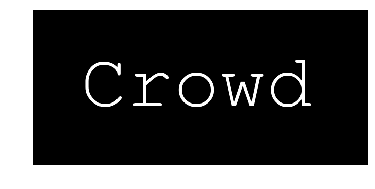

In [166]:
def draw_text(font='FreeMono', path='/Users/hanbo/Desktop/5306/p3/fonts/', txt="Crowd", char_height=100, test_mode = False):
    if not test_mode:
        bg_color = (255, 255, 255)
        txt_color = (0,0,0)
    else:
        bg_color = (0, 0, 0)
        txt_color = (255, 255, 255)
    char_width = char_height / 2
    height = int(char_height * 3)
    width = int(len(txt) * char_width * 2 * 1.3)
    img = Image.new('RGB', (width, height), bg_color)
    # get a font
    font_path = path + font + ".ttf"
    fnt = ImageFont.truetype(font_path, 150)
    # get a drawing context
    d = ImageDraw.Draw(img)

    anchor = (int(width / 7), int(height / 4.5))
    d.text(anchor, txt, font=fnt, fill=txt_color)
    return img

# unit test
img = draw_text(test_mode=True)
plot_img(img)
# img.show()

In [167]:
def plot_img(img):
    plt.imshow(img)  # 显示图片
    plt.axis('off')  # 不显示坐标轴
    plt.show()

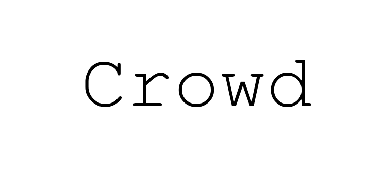

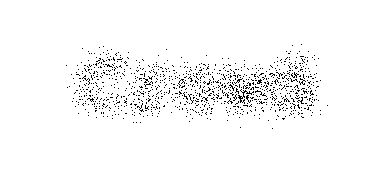

In [170]:
img = draw_text(test_mode=False)
plot_img(img)
img = rgb2bw(img)
img = gaussian_blur(img, scale=15)
plot_img(img)